In [1]:
% pylab inline
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Image
import math
from __future__ import print_function

gray();

Populating the interactive namespace from numpy and matplotlib


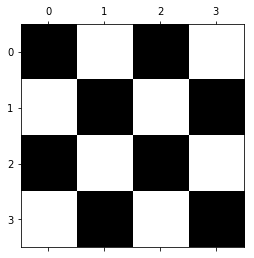

In [9]:
# To create a checker board pattern
size = 4
img = np.zeros((size, size))

# walks therough the matrix
for n in range(0, size):
    for m in range(0, size):
        if (n & 0x1) ^ (m & 0x1): #if n and m are not simultanoeusly odd
            img[n,m] = 255

plt.matshow(img)

### Actual Images

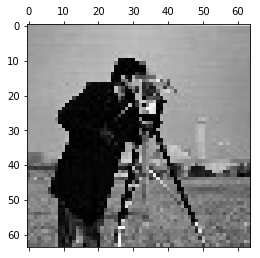

In [13]:
# read images from disk
img = np.array(plt.imread('cameraman.jpg'), dtype=int)
plt.matshow(img);

This is image of the famous the famous "cameraman" test picture

In [14]:
# looking at the first column
img[:, 0]

array([156, 157, 157, 152, 154, 155, 151, 157, 152, 155, 158, 159, 159,
       160, 160, 161, 155, 160, 161, 161, 164, 162, 160, 162, 158, 160,
       158, 157, 160, 160, 159, 158, 163, 162, 162, 157, 160, 114, 114,
       103,  88,  62, 109,  82, 108, 128, 138, 140, 136, 128, 122, 137,
       147, 114, 114, 144, 112, 115, 117, 131, 112, 141,  99,  97])

### The canonical Basis

In [17]:
# function to create the canonical basis ()for a matrix
def canonical(n, M=5, N=10):
    e = np.zeros((M,N))
    e[(n % M), int(n/M)] = 1 # n%M ensure it's < M; int(n/M) fixes the column
    # so that n is the position of the 1
    return e

In [19]:
a = canonical(2)
a

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

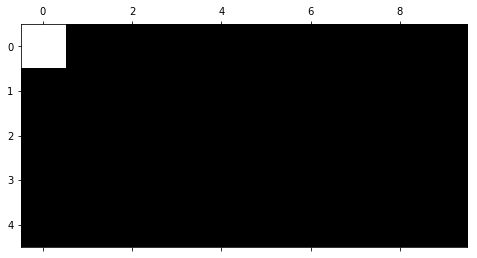

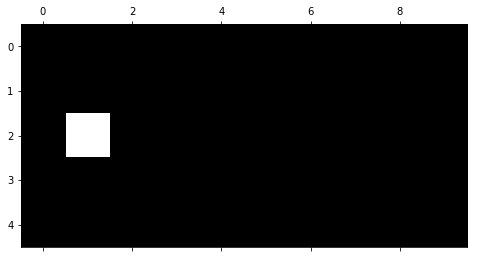

In [23]:
plt.matshow(canonical(0))
plt.matshow(canonical(7))

### Transmitting images

Suppose we want to transmit the image over the communication channel and there's a failure such that half of the data is lost.
We may end up with something like below:

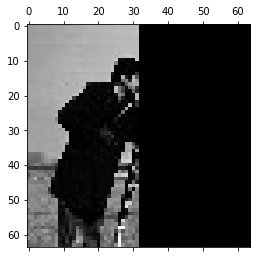

In [26]:
# unrolling of the image for transmission
tx_img = np.ravel(img,order="F" ) # F implies first index moving fastest

# half of data lost
tx_img[int(len(tx_img)/2):] = 0
rx_img = np.reshape(tx_img, (64, 64), "F");
plt.matshow(rx_img)

### Better Transmission Scheme

We do the following:
* project the image in the Haar basis
* transmit just the projection coefficients
* rebuild the image using the basis vectors

We need a basis that will be robust to loss of some coefficients


In [27]:
def haar1D(n, SIZE):
    # check power of two
    if math.floor(math.log(SIZE) / math.log(2)) != math.log(SIZE) / math.log(2):
        print("Haar defined only for lengths that are a power of two")
        return None
    if n >= SIZE or n < 0:
        print("invalid Haar index")
        return None
    
    # zero basis vector
    if n == 0:
        return np.ones(SIZE)
    
    # express n > 1 as 2^p + q with p as large as possible;
    # then k = SIZE/2^p is the length of the support
    # and s = qk is the shift
    p = math.floor(math.log(n) / math.log(2))
    pp = int(pow(2, p))
    k = SIZE / pp
    s = (n - pp) * k
    
    h = np.zeros(SIZE)
    h[int(s):int(s+k/2)] = 1
    h[int(s+k/2):int(s+k)] = -1
    # these are not normalized
    return h


def haar2D(n, SIZE=8):
    # get horizontal and vertical indices
    hr = haar1D(n % SIZE, SIZE)
    hv = haar1D(int(n / SIZE), SIZE)
    # 2D Haar basis matrix is separable, so we can
    #  just take the column-row product
    H = np.outer(hr, hv)
    H = H / math.sqrt(np.sum(H * H))
    return H

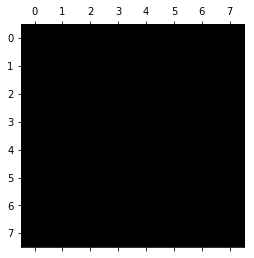

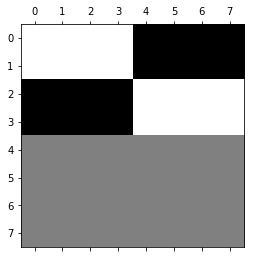

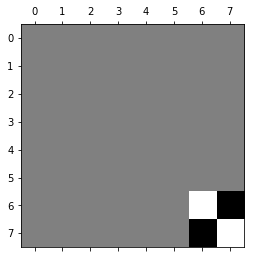

In [30]:
visualising some 2D Haar bases
plt.matshow(haar2D(0));
plt.matshow(haar2D(10));
plt.matshow(haar2D(63));

Observe that each basis has some symmetry in balck and white with low index matrices take differences in large areas while higher index take differences in smaller areas

In [31]:
# verifying that the Haar basis are orthogonal

for m in range(0, 64):
    for n in range(0, 64):
        r = np.sum(haar2D(m,8) * haar2D(n,8))
        if r != 0:
            print("[%dx%d -> %f] " % (m, n, r), end="") #shows orthornomality of the basis
            

[0x0 -> 1.000000] [1x1 -> 1.000000] [2x2 -> 1.000000] [3x3 -> 1.000000] [4x4 -> 1.000000] [5x5 -> 1.000000] [6x6 -> 1.000000] [7x7 -> 1.000000] [8x8 -> 1.000000] [9x9 -> 1.000000] [10x10 -> 1.000000] [11x11 -> 1.000000] [12x12 -> 1.000000] [13x13 -> 1.000000] [14x14 -> 1.000000] [15x15 -> 1.000000] [16x16 -> 1.000000] [16x17 -> -0.000000] [17x16 -> -0.000000] [17x17 -> 1.000000] [18x18 -> 1.000000] [19x19 -> 1.000000] [20x20 -> 1.000000] [21x21 -> 1.000000] [22x22 -> 1.000000] [23x23 -> 1.000000] [24x24 -> 1.000000] [24x25 -> -0.000000] [25x24 -> -0.000000] [25x25 -> 1.000000] [26x26 -> 1.000000] [27x27 -> 1.000000] [28x28 -> 1.000000] [29x29 -> 1.000000] [30x30 -> 1.000000] [31x31 -> 1.000000] [32x32 -> 1.000000] [33x33 -> 1.000000] [34x34 -> 1.000000] [35x35 -> 1.000000] [36x36 -> 1.000000] [37x37 -> 1.000000] [38x38 -> 1.000000] [39x39 -> 1.000000] [40x40 -> 1.000000] [41x41 -> 1.000000] [42x42 -> 1.000000] [43x43 -> 1.000000] [44x44 -> 1.000000] [45x45 -> 1.000000] [46x46 -> 1.0000

### Transmit!

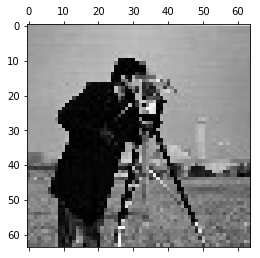

In [33]:
tx_img = np.zeros(64*64)
for k in range(64*64):
    tx_img[k] = np.sum(img * haar2D(k, 64)) # gets the projection
    
# reconstruction (note that the basis is orthornormal)
rx_img = np.zeros((64, 64))
for k in range(0, (64*64)):
    rx_img += tx_img[k] * haar2D(k, 64)
    
plt.matshow(rx_img); # this should yield original image

### And if we loose some (say 50%) of the co-effiecents of the projection?!

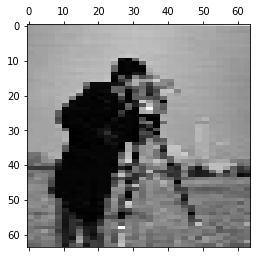

In [34]:
lossy_img = np.copy(tx_img);
lossy_img[int(len(tx_img)/2):] = 0

# let's see what we've got left
rx_img = np.zeros((64, 64))
for k in range(0, (64*64)):
    rx_img += lossy_img[k] * haar2D(k, 64)
    
plt.matshow(rx_img)

### isn't that remarkable
we lost some details but notice they are the other half (which is the fine details). What happens if we lost the first half instead?

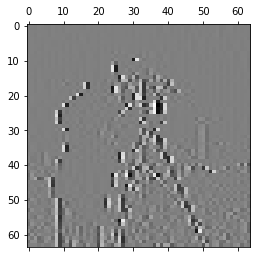

In [35]:
lossy_img = np.copy(tx_img);
lossy_img[0:int(len(tx_img)/2)] = 0

# let's see what we've got left
rx_img = np.zeros((64, 64))
for k in range(0, (64*64)):
    rx_img += lossy_img[k] * haar2D(k, 64)
    
plt.matshow(rx_img)

Interesting. obviously the details build up with higher order of the haar bases.
So it may be important for instance to send the most information first and then follow up with the details if the channel permits (a sample application)